# AE-410 GPS (Assignment-1 Fundamentals of GPS)
Rollno. 20D170022
Name - Lyric Khare

In [25]:
# Shri Ganeshaya Namah
# @author.lyrickhare

## Some important Relations / Properties
- $C_i(\eta-\tau)$ is the PRN code (similar to a vector/array with 1023 dimensions/elements) for $i-th$ satellite, delayed by $\tau$ chips
- $C_i(\eta) = C_i(\eta+1023)$ i.e. PRN codes are periodic with period = 1023 chips = 1 millisecond
- $\frac{C_i(\eta)\oplus C_j(\eta-\tau)}{1023} = 1$ {iff $i=j$ and $\tau = 0$, = 0 otherwise}
- $\oplus$ in the above point denotes correlation, i.e. element wise multiplication:

    - $C_i(\eta)\oplus C_j(\eta-\tau) = \sum_{r = 0}^{r = 1022}  C_i(\eta)[r]\cdot C_j(\eta-\tau)[r] $
    - $C_i(\eta)[r]$ is a scalar value having 0 or 1 value

## References / Resources
- Github repository having 32 GPS PRN codes https://github.com/danipascual/GNSS-matlab.git

In [26]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [27]:
# GPS PRN Extraction
codesFile = scipy.io.loadmat("randomData/codes_L1CA.mat")
codes = np.array(codesFile['codes_L1CA'])

In [28]:
# shape of codes array
print(codes.shape)

(1023, 32)


Proof of $\frac{C_i(\eta)\oplus C_j(\eta-\tau)}{1023} = 1$ {iff $i=j$ and $\tau = 0$, = 0 otherwise}


In [29]:
corrArr = np.zeros((2,2,1023))
for i in range(0,2):
    for k in range(0,2):
        for j in range(0,len(corrArr)):
            corrArr[i][k][j]=  np.correlate(codes[:,i],np.roll(codes[:,k],-j),'valid')

C:\Users\lyric\AppData\Local\Temp\ipykernel_9340\3946328126.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  corrArr[i][k][j]=  np.correlate(codes[:,i],np.roll(codes[:,k],-j),'valid')


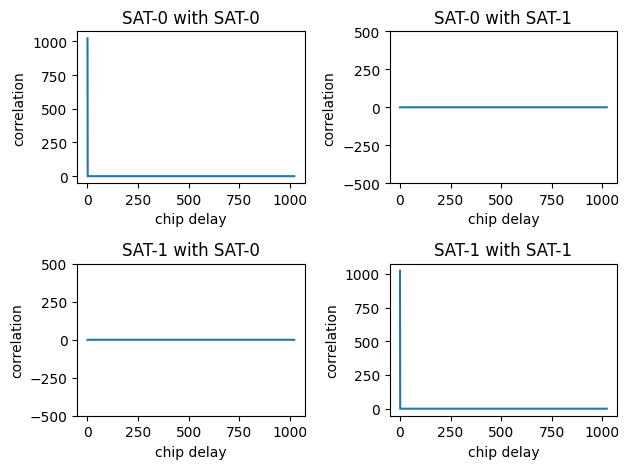

In [30]:
%matplotlib inline
plt.subplot(2,2,1)
plt.plot(corrArr[0,0,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.title('SAT-0 with SAT-0')
plt.subplot(2,2,2)
plt.plot(corrArr[0,1,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.yticks(np.linspace(-500,500,5))
plt.title('SAT-0 with SAT-1')
plt.subplot(2,2,3)
plt.plot(corrArr[1,0,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.yticks(np.linspace(-500,500,5))
plt.title('SAT-1 with SAT-0')
plt.subplot(2,2,4)
plt.plot(corrArr[1,1,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.title('SAT-1 with SAT-1')

plt.tight_layout()

It is clear that the correlation is high only when there is 0 delay and same satellite PRN

### Q1
Write a MATLAB/Python/C/C++ program to compute circular autocorrelation of PRN 8 with a 
delayed PRN code by 200 chips and plot the results

### Soln:
 $\frac{C_8(\eta)\oplus C_8(\eta-200)}{1023}$

In [31]:
np.correlate(codes[:,8],np.roll(codes[:,8],-200),'valid')/1023

array([-0.00097752])

maximum value comes when two overlap fully, which is at 200


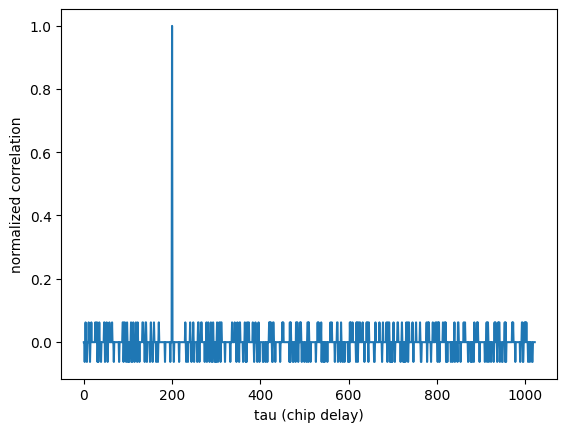

In [32]:
# plot for different delays of main PRN
tempval = [np.correlate(np.roll(codes[:,8],-i),np.roll(codes[:,8],-200),'valid')/1023 for i in range(0,1023)]
plt.plot(tempval)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")
print("maximum value comes when two overlap fully, which is at " + str(np.argmax(tempval)))

### Q2
Write a MATLAB/ Python/C/C++ program to compute circular cross correlation of PRN 8 with a 
delayed copy of a PRN 16 by 900 chips and plot the results.

### Soln:
 $\frac{C_8(\eta)\oplus C_{16}(\eta-900)}{1023}$

In [33]:
np.correlate(codes[:,8],np.roll(codes[:,16],-900),'valid')/1023

array([-0.00097752])

maximum value never comes as both PRN are different, can be clearly seen as max(abs(correlation)) = [0.06353861]


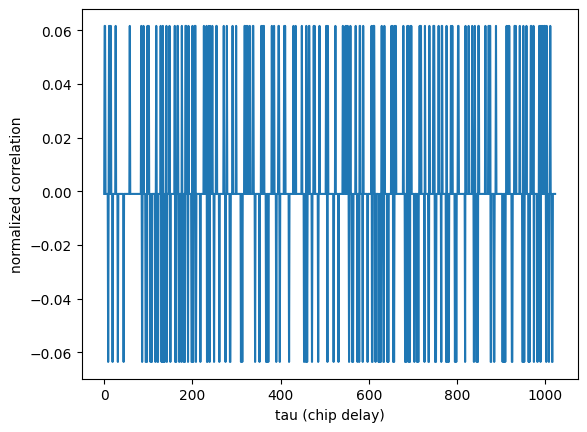

In [34]:
# plot for different delays in main PRN
tempval = [np.correlate(np.roll(codes[:,8],-i),np.roll(codes[:,16],-900),'valid')/1023 for i in range(0,1023)]
plt.plot(tempval)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")
print("maximum value never comes as both PRN are different, can be clearly seen as max(abs(correlation)) = "+str(max(np.abs(tempval))))

### Q3
Write a MATLAB/Python/C/C++ program to compute autocorrelation of PRN 8 with a delayed 
PRN code by -1, 0, and 1 chip, respectively and plot the correlation with the delay chip. 

### Soln:
- $\frac{C_8(\eta) \oplus C_{8}(\eta+1)}{1023}$
- $\frac{C_8(\eta) \oplus C_{8}(\eta-0)}{1023}$
- $\frac{C_8(\eta) \oplus C_{8}(\eta-1)}{1023}$

Text(0, 0.5, 'normalized correlation')

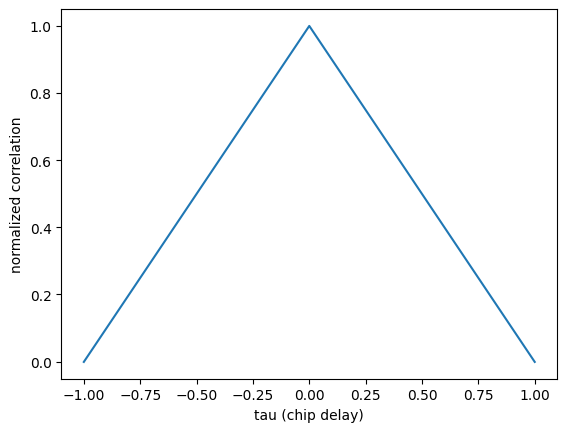

In [35]:
cor = np.zeros((3,1))
cor[0] = np.correlate(codes[:,8],np.roll(codes[:,8],1),'valid')/1023
cor[1] = np.correlate(codes[:,8],np.roll(codes[:,8],0),'valid')/1023
cor[2] = np.correlate(codes[:,8],np.roll(codes[:,8],-1),'valid')/1023
plt.plot(np.array([-1,0,1]),cor)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")

### Q4
Write a MATLAB/ Python/C/C++ program to compute circular autocorrelation of PRN 8 with a 
noisy PRN code delayed by 200 chips and plot the results. Assume the noise is white Gaussian additive and 
generated with mean zero and standard deviation of 4.

### Soln:
- $PRN_{noisy} = (C_8(\eta-200) + N(0,4))$
- $C_8(\eta)\oplus PRN_{noisy}$

In [36]:
noisy = (np.array(codes[:,8])+ (np.random.normal(0,4,1023)))
np.correlate(codes[:,8],np.roll(noisy,-200),'valid')/1023

array([-0.06035287])

here we can see that due to noise the non-peak values have a higher range


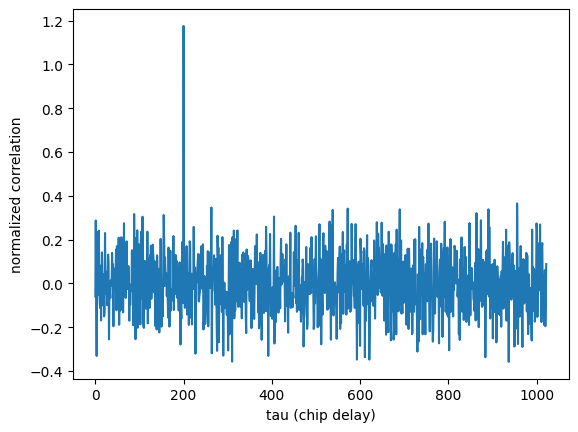

In [37]:
# plot for different delays of main PRN
tempval = [np.correlate(np.roll(codes[:,8],-i),np.roll(noisy,-200),'valid')/1023 for i in range(0,1023)]
plt.plot(tempval)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")
print("here we can see that due to noise the non-peak values have a higher range")

### Q5
Write a MATLAB/ Python/C/C++ program to implement serial search/parallel code phase search 
acquisition algorithm. Identify the satellites (PRN IDs), carrier frequency, and code phase using the
acquisition algorithm in the data file provided in the Google drive

### Sol.
- we know the signal received at the antenna is:


$s(t) = \sqrt{2P}D(t-\tau)C_j(t-\tau)cos((w_L+w_D)t+\theta)$
where : 
    - P is power
    - $\tau$ is delay ($\tau = \tau_{int} + \tau_{frac}$)
    - $w_L$ is L-5 band frequency and $w_D$ is doppler frequency

- After RF front-end processing we get:

$ I = \sqrt{2P_1}D(t-\tau)C_j(t-\tau)cos( (w_D)t+\theta)$


$ Q = \sqrt{2P_1}D(t-\tau)C_j(t-\tau)sin( (w_D)t+\theta)$

where:
    - I is Inphase samples
    - Q is Quadrature samples

**Note** : slight abuse of notation is used as we defined C for discrete values while here we are considering it as continous, but this discrepancy will be resolved in program as we have input data as discrete samples

#### Now,
for serial search we need to get 3 parameters 

- $i$ the satellite number
- $\tau_{frac} \in [0,1022]$
- $w_D \in [-10k Hz : 500 Hz : 10k Hz]$

#### Steps

- Firstly, we will rewrite signal as $S = I + Qj = \sqrt{2P_1}D(t-\tau)C(t-\tau)e^{jw_dt}$

- Then, we will multiply $S$ by $C(t-\hat\tau)e^{-j\hat w_dt}$

- We will get:

$ Corr = \sqrt{2P_1}D(t-\tau)C_j(t-\tau)\oplus C_i(t-\hat\tau)e^{j(w_d-\hat w_d)t}$

it will attain it's maximum when :

$w_d-\hat w_d = 0$


$\tau = \hat\tau$

$i = j = $ satellite number of incoming signal

In [38]:
# Assumptions: 
#   - Sampling frequency is Fs which is a multiple of 1.023 MHz
#   - Fs = n*1.023 MHz

def modPRN(PRN,n,tau):
    """
    function to get modified PRN for some sampling frequency & delay
    Inputs: 
        - PRN is the PRN code for single satellite with 1023 length
        - n = SamplingFrequency/1.023e6 
    Output:
        - PRN code for 1 millisecond with length = 1023*n
        - This PRN code is delayed by tau chips
    """

    # return np.roll(np.repeat(PRN,n),-tau)
    return np.repeat(np.roll(PRN,-tau),n)

In [39]:
# Checking modPRN
someArrForModPRN = np.array([1,2,3,4,5])
modPRN(someArrForModPRN,3,4)

array([5, 5, 5, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [40]:
wds = np.linspace(-10000,10000,41)*2*np.pi
def serialSearch(I, Q, knownPRNs, Fs, wds=wds):
    rcvdSignal = np.array(I+Q*1j)
    n = int(Fs/1.023e6)
    t = np.linspace(0,1,n*1023)*1e-3
    totalSatellites = knownPRNs.shape[1]
    corr = np.zeros((totalSatellites,len(wds),1023))
    for x in range(0,totalSatellites):
        for y in range(0,len(wds)):
            for z in range(0,1023):
                generatedSignal = modPRN(knownPRNs[:,x],n,z)*np.array(np.exp(-1j*wds[y]*t))
                corr[x,y,z] = np.abs(np.sum(generatedSignal*rcvdSignal))
    return corr




In [41]:
t = np.linspace(0,1,1023)*1e-3

In [42]:
sirPRNI = modPRN(codes[:,20],1,82)*np.cos(2*np.pi*675*t)
sirPRNQ = modPRN(codes[:,20],1,82)*np.sin(2*np.pi*675*t)

In [43]:
corr = serialSearch(sirPRNI,sirPRNQ,codes,1.023e6)

In [44]:
satNum,wdstar,taustar = np.unravel_index(corr.argmax(), corr.shape) 

In [45]:
satNum

20

In [46]:
wds[wdstar]/(2*np.pi)

499.99999999999994

In [47]:
taustar

82

We can clearly see that we got the desired result

Text(0.5, 1.0, 'Recieved signal has satNum=20, delay=82chips, Fs = 1.023e6\n          with normal noise (0,4)')

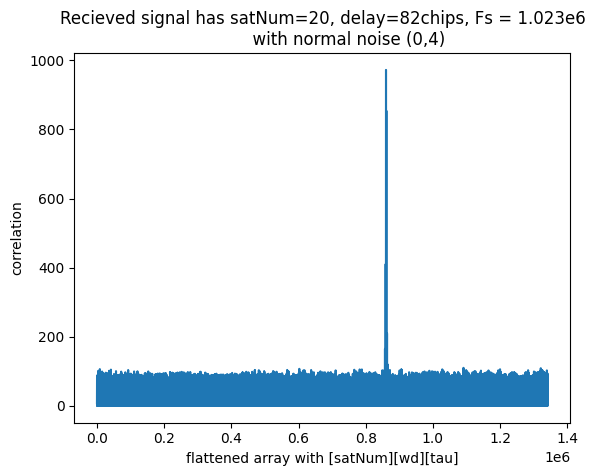

In [48]:
plt.plot(corr.flatten())
plt.ylabel("correlation")
plt.xlabel("flattened array with [satNum][wd][tau]")
plt.title("""Recieved signal has satNum=20, delay=82chips, Fs = 1.023e6
          with normal noise (0,4)""")